In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [6]:
df = pd.read_excel("/content/sales_analytics_project_data.xlsx")

df.head()

,Order_ID,Order_Date,Region,Category,Product,Quantity,Unit_Price,Discount_%,Customer_Rating,Gross_Sales,Discount_Amount,Net_Sales
0,1001,2024-04-12,East,Electronics,Oil,4,16546,10,3,66184,6618.40,59565.60
1,1002,2024-12-14,East,Groceries,Oil,1,2800,15,2,2800,420.00,2380.00
2,1003,2024-09-27,North,Clothing,Oil,9,46205,15,1,415845,62376.75,353468.25
3,1004,2024-04-16,South,Electronics,Table,8,29467,5,4,235736,11786.80,223949.20
4,1005,2024-03-12,South,Clothing,T-Shirt,8,36522,0,5,292176,0.00,292176.00


In [7]:
df.shape

(1000, 12)

In [8]:
df.columns

Index(['Order_ID', 'Order_Date', 'Region', 'Category', 'Product', 'Quantity',
       'Unit_Price', 'Discount_%', 'Customer_Rating', 'Gross_Sales',
       'Discount_Amount', 'Net_Sales'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Order_ID         1000 non-null   int64         
 1   Order_Date       1000 non-null   datetime64[ns]
 2   Region           1000 non-null   object        
 3   Category         1000 non-null   object        
 4   Product          1000 non-null   object        
 5   Quantity         1000 non-null   int64         
 6   Unit_Price       1000 non-null   int64         
 7   Discount_%       1000 non-null   int64         
 8   Customer_Rating  1000 non-null   int64         
 9   Gross_Sales      1000 non-null   int64         
 10  Discount_Amount  1000 non-null   float64       
 11  Net_Sales        1000 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(6), object(3)
memory usage: 93.9+ KB


In [10]:
df.isnull().sum()

,0
Order_ID,0
Order_Date,0
Region,0
Category,0
Product,0
Quantity,0
Unit_Price,0
Discount_%,0
Customer_Rating,0
Gross_Sales,0


In [11]:
df = df.drop_duplicates()

df["Order_Date"] = pd.to_datetime(df["Order_Date"])
df["Net_Sales"] = pd.to_numeric(df["Net_Sales"])

BUSINESS QUESTIONS


In [12]:
#Q1. Total number of orders
df["Order_ID"].nunique()

1000

In [14]:
#Q2. Total revenue
df["Net_Sales"].sum()

np.float64(114519236.15)

In [15]:
#Q3. Average order value
df["Net_Sales"].mean()

np.float64(114519.23615000001)

In [16]:
#Q4. Revenue by region
df.groupby("Region")["Net_Sales"].sum()

,Net_Sales
Region,
East,25778478.20
North,32438740.20
South,30708483.50
West,25593534.25


In [18]:
#Q5. Revenue by category
df.groupby("Category")["Net_Sales"].sum()


,Net_Sales
Category,
Clothing,25850622.60
Electronics,29155960.95
Furniture,31063494.15
Groceries,28449158.45


In [19]:
#Q6. Top 5 products by revenue
df.groupby("Product")["Net_Sales"].sum().sort_values(ascending=False).head(5)

,Net_Sales
Product,
T-Shirt,16561194.90
Chair,15363031.95
Rice,15159154.60
Oil,14501175.95
Table,14475031.10


In [20]:
#Q7. Average discount by category
df.groupby("Category")["Discount_%"].mean()

,Discount_%
Category,
Clothing,10.131004
Electronics,10.158103
Furniture,11.096654
Groceries,9.698795


In [21]:
#Q8. Orders with discount > 10%
df[df["Discount_%"] > 10]

,Order_ID,Order_Date,Region,Category,Product,Quantity,Unit_Price,Discount_%,Customer_Rating,Gross_Sales,Discount_Amount,Net_Sales
1,1002,2024-12-14,East,Groceries,Oil,1,2800,15,2,2800,420.00,2380.00
2,1003,2024-09-27,North,Clothing,Oil,9,46205,15,1,415845,62376.75,353468.25
6,1007,2024-01-21,South,Furniture,Jeans,7,16393,15,3,114751,17212.65,97538.35
8,1009,2024-05-01,East,Clothing,Mobile,9,19433,20,4,174897,34979.40,139917.60
9,1010,2024-08-02,South,Groceries,T-Shirt,3,48221,15,1,144663,21699.45,122963.55
...,...,...,...,...,...,...,...,...,...,...,...,...
981,1982,2024-11-21,North,Groceries,Chair,5,13882,15,2,69410,10411.50,58998.50
983,1984,2024-11-19,South,Clothing,Jeans,4,23583,15,5,94332,14149.80,80182.20
992,1993,2024-03-30,West,Furniture,Jeans,2,9421,20,1,18842,3768.40,15073.60
993,1994,2024-05-21,East,Groceries,Jeans,8,11610,20,1,92880,18576.00,74304.00


In [22]:
#Q9. Total quantity sold by product
df.groupby("Product")["Quantity"].sum()

,Quantity
Product,
Chair,602
Jeans,628
Laptop,577
Mobile,560
Oil,661
Rice,641
T-Shirt,645
Table,686


In [23]:
#Q10. Monthly revenue trend
df["Month"] = df["Order_Date"].dt.month

df.groupby("Month")["Net_Sales"].sum()

,Net_Sales
Month,
1,9489258.40
2,11334478.60
3,7321174.70
4,10630187.60
5,11298437.00
6,7792391.55
7,7379057.55
8,12234567.15
9,9685074.30


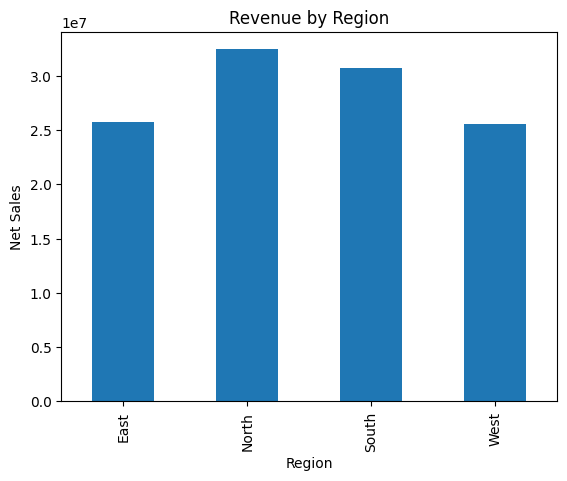

In [24]:
#Revenue by Region (Bar Chart)
df.groupby("Region")["Net_Sales"].sum().plot(kind="bar")
plt.title("Revenue by Region")
plt.xlabel("Region")
plt.ylabel("Net Sales")
plt.show()

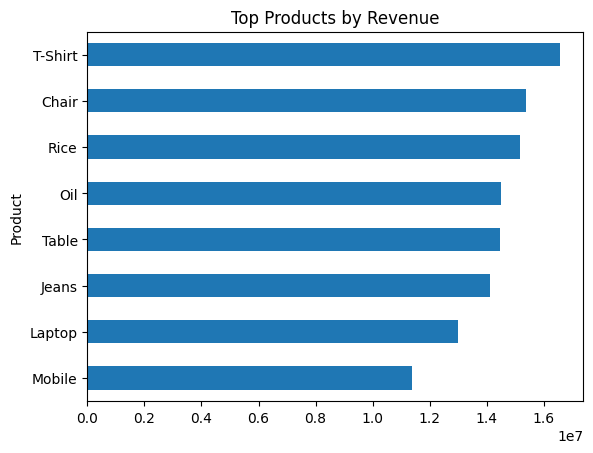

In [25]:
#Top Products by Revenue
df.groupby("Product")["Net_Sales"].sum().sort_values().plot(kind="barh")
plt.title("Top Products by Revenue")
plt.show()

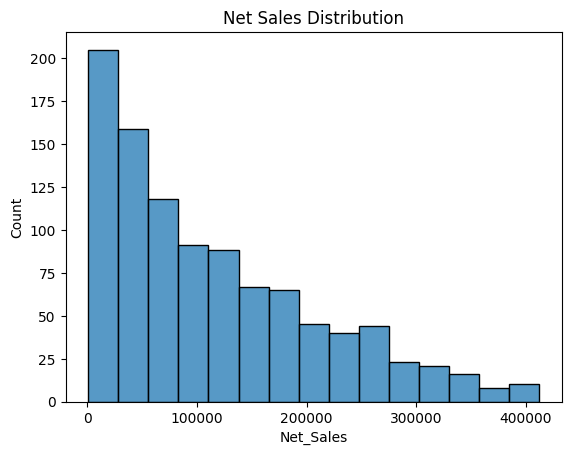

In [26]:
#Sales Distribution
sns.histplot(df["Net_Sales"])
plt.title("Net Sales Distribution")
plt.show()

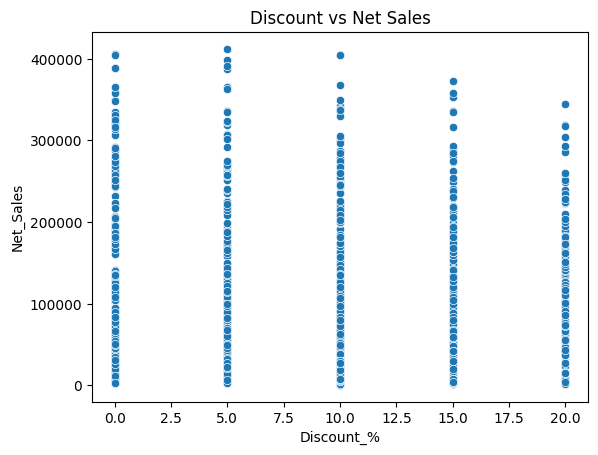

In [27]:
#Discount vs Sales
sns.scatterplot(x="Discount_%", y="Net_Sales", data=df)
plt.title("Discount vs Net Sales")
plt.show()